# SVM MODEL

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Data

In [2]:
# Model 1 -> Lasso selected variables
full_train = pd.read_csv("../../../data/csev/model_3/trainCSEV.csv")
full_test = pd.read_csv("../../../data/csev/model_3/testCSEV.csv")

In [3]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

1    27796
0    27794
Name: C_SEV, dtype: int64

In [4]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

## SVC

In [5]:
svc = SVC(gamma = 'auto')

In [6]:
svc.fit(X_train, Y_train)

SVC(gamma='auto')

In [7]:
Y_pred = svc.predict(X_test)

## Evaluation

In [8]:
metrics.accuracy_score(Y_test, Y_pred)

0.6924499005830969

Matriz de confusión
[[  4430   2519]
 [107611 243528]]
Matriz de confusión normalizada
[[0.6375018  0.3624982 ]
 [0.30646268 0.69353732]]


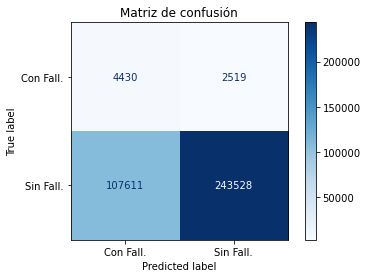

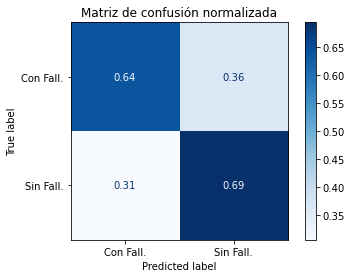

In [9]:
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svc,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.64      0.07      6949
           1       0.99      0.69      0.82    351139

    accuracy                           0.69    358088
   macro avg       0.51      0.67      0.45    358088
weighted avg       0.97      0.69      0.80    358088



In [12]:
file_name = "../../../models/svm_model_3.sav"
pickle.dump(svc, open(file_name, "wb"))